# Analysis of Police Incidents at City Level 

### Description: 

Incidents to evaluate: LARCENY/THEFT, ASSAULT, BURGLARY, 

* Are the particular trends of police incidents at city level?
* Have the incidents increased or decreased by year?  

* 1) Total number of incidents by year.

* 2) Percentage of incidents by categoy in a specific period of time ( by year )? 

* 3) Which are the top 10 crimes?


### Dependencies

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

### Read main_data.zip dataset

In [2]:
data_zip_path = 'data/main-data.zip'
zf = zipfile.ZipFile(data_zip_path) # having Police_Incidents.csv zipped file.
data_df = pd.read_csv(zf.open('main-data.csv'))
data_df.dtypes

id              int64
year            int64
month           int64
day_m           int64
day_w          object
time           object
category       object
meta_cat       object
resolution     object
location       object
lat           float64
lng           float64
zipcode         int64
dtype: object

In [3]:
main_df = data_df.drop(['day_w', 'time', 'location', 'zipcode', 
                        'lat', 'lng', 'resolution'], axis=1)
main_df.shape

(1169076, 6)

In [4]:
# Total of Incidents by year without selecting special crimes

total_incdt_by_year = main_df.groupby(['year'])
total_incdt_by_year.size()

year
2010    133523
2011    132697
2012    140847
2013    152806
2014    150128
2015    156526
2016    150876
2017    151673
dtype: int64

###  Have the incidents increased or decreased by year?

We create an overview table to summarize the total of incidents  by category at city level every year. Our period of time runs from 2010 to 2017.

We take a look at the top 13 categories. We have not ineterested on categories 'Other Offenses' and 'Non-criminal', because it is not personal and public safety.


In [5]:
# Get the totals of each category per year, and find which are the top 13.

group_cat_y = main_df.groupby(['category', 'year'])
cat_year_df = group_cat_y["id"].size()
cat_year_df = cat_year_df.unstack()
cat_year_df= cat_year_df.fillna(0)
cat_year_df.stack()
top13_df = cat_year_df.nlargest(13,2010)

# Save to a csv files.
top13_df.to_csv('output/top13_categories_year.csv')

top13_df

year,2010,2011,2012,2013,2014,2015,2016,2017
category,,,,,,,,
LARCENY/THEFT,24446.0,25905.0,30976.0,36412.0,38003.0,42068.0,40448.0,46834.0
OTHER OFFENSES,20990.0,19552.0,18646.0,19480.0,20740.0,20382.0,19686.0,17947.0
NON-CRIMINAL,13877.0,15586.0,16936.0,21084.0,19404.0,19177.0,17920.0,16979.0
ASSAULT,12387.0,12279.0,12181.0,12580.0,12402.0,13115.0,13602.0,13463.0
DRUG/NARCOTIC,9205.0,6935.0,6444.0,6775.0,5408.0,4251.0,4246.0,3252.0
VANDALISM,7934.0,7243.0,7808.0,6921.0,7165.0,7675.0,8595.0,9616.0
WARRANTS,6187.0,6311.0,6300.0,7362.0,6726.0,6815.0,5975.0,4897.0
SUSPICIOUS OCC,6004.0,6207.0,5860.0,5677.0,5230.0,5500.0,5801.0,6008.0
BURGLARY,4966.0,4987.0,6243.0,6195.0,6066.0,5931.0,5812.0,5719.0


In [6]:
# We take a look at the top 13 categories. 
# We have not ineterested on categories 'Other Offenses' and 'Non-criminal', 
# because it is not personal and public safety.

categories = ['LARCENY/THEFT', 'ASSAULT', 'DRUG/NARCOTIC', 'VANDALISM', 'WARRANTS',  
             'SUSPICIOUS OCC', 'BURGLARY', 'VEHICLE THEFT', 'ROBBERY', 'FRAUD']

subset_df = main_df[main_df.category.isin(categories)]

In [7]:
# Pivot Table at City Level

pvt_cat_year = subset_df.pivot_table(index=['year'], 
                                     columns=['category'], 
                                     values='id',  
                                     aggfunc='count', 
                                     fill_value=0)

# Save to a csv files.
pvt_cat_year.to_csv('output/top10_categories_year.csv')

pvt_cat_year

category,ASSAULT,BURGLARY,DRUG/NARCOTIC,FRAUD,LARCENY/THEFT,ROBBERY,SUSPICIOUS OCC,VANDALISM,VEHICLE THEFT,WARRANTS
year,,,,,,,,,,
2010,12387,4966,9205,2656,24446,3324,6004,7934,4346,6187
2011,12279,4987,6935,2756,25905,3376,6207,7243,4762,6311
2012,12181,6243,6444,2698,30976,3955,5860,7808,6183,6300
2013,12580,6195,6775,2752,36412,4196,5677,6921,6241,7362
2014,12402,6066,5408,2988,38003,3420,5230,7165,7108,6726
2015,13115,5931,4251,3136,42068,3759,5500,7675,7943,6815
2016,13602,5812,4246,2650,40448,3300,5801,8595,6422,5975
2017,13463,5719,3252,2453,46834,3313,6008,9616,5646,4897


In [8]:
# Change pivot table to records, for plotting using seaborn library

# Convert pivot table to records
new_data_df = pd.DataFrame(pvt_cat_year.to_records())
# Save to a csv files.
new_data_df.to_csv('output/top10_categories_year.csv', index=False)

new_data_df.columns = [hdr.replace("('id', ", "").replace(")", "") \
                     for hdr in new_data_df.columns]

new_data_df = new_data_df.melt('year', var_name='cols', value_name='vals')

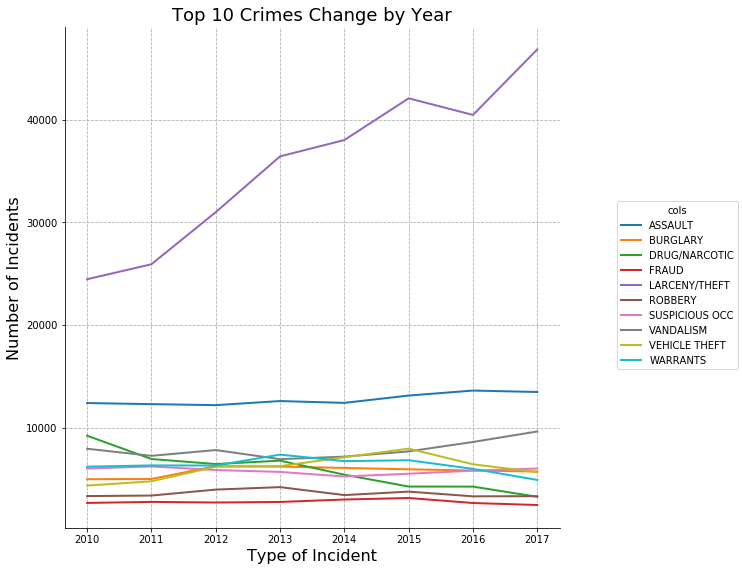

In [9]:
# Graph of Totals incidents by year (Top 10 crimes)

g = sns.FacetGrid(new_data_df, hue="cols", size=6)
g = (g.map(plt.plot, "year", "vals", linewidth=2).add_legend())

fig = plt.gcf()
fig.set_size_inches(11, 8)

#Incorporate the other graph properties

plt.title("Top 10 Crimes Change by Year" , fontsize=18)
plt.ylabel("Number of Incidents", fontsize=16)
plt.xlabel("Type of Incident", fontsize=16)
plt.grid(True, ls='dashed')
plt.savefig('output/top10crimes.png')
plt.show()


In [10]:
# Function for plotting several lines

def plot_func(cat):
    
    plt.plot(pvt_cat_year[cat], marker='o', markersize=8, alpha=0.6, linestyle='dashed', linewidth=1)

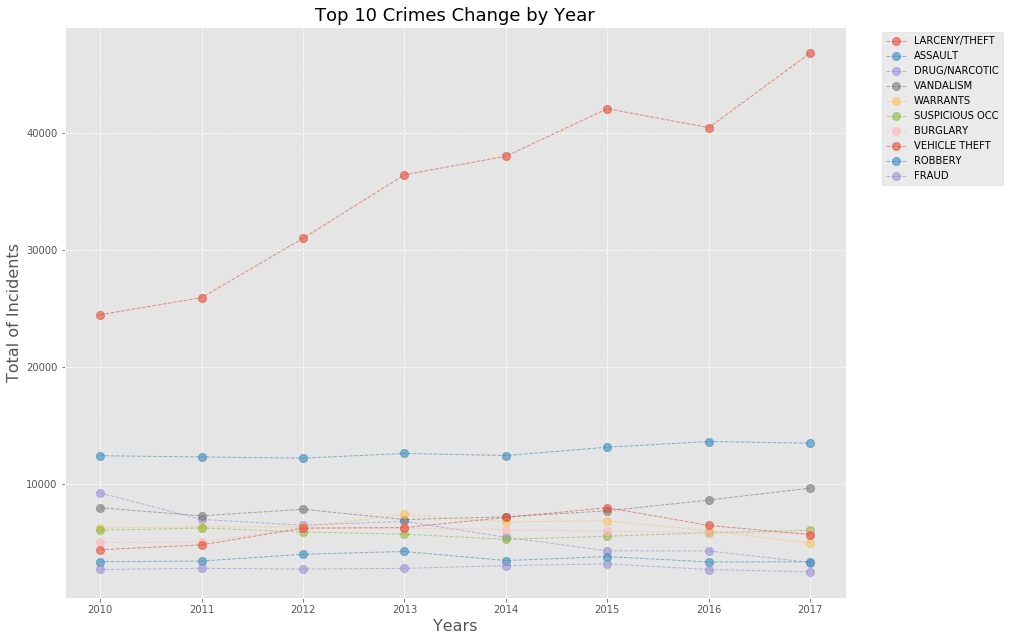

In [11]:
# Graph of Totals incidents by year (Top 10 crimes) 2nd. option.

plt.style.use('ggplot')
fig = plt.gcf()
fig.set_size_inches(14, 10.5)

for c in categories:
    plot_func(c)

# Put a legend below current axis
plt.title("Top 10 Crimes Change by Year" , fontsize=18)
plt.ylabel("Total of Incidents", fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.grid(True, ls='dashed')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig('output/top10crimes2.png')
plt.show()

###  Are the particular trends of police incidents at city level?

2) Percentage of incidents by categoy in a specific period of time ( by year, by monnth )


In [12]:
# Total of 10 categories or type of incidents by year without selecting special crimes

group_by_year = subset_df.groupby(['year'])
totals_by_year = group_by_year["id"].count()
totals_by_year

year
2010     81455
2011     80761
2012     88648
2013     95111
2014     94516
2015    100193
2016     96851
2017    101201
Name: id, dtype: int64

In [13]:
# Calculate percentage using the Series 'totals_by_year' and the Dataframe top13

years=[2010,2011,2012,2013,2014,2015,2016,2017]

pctg_df = pd.DataFrame()

for y in years:
    total = totals_by_year.get(y)
    name="pct_" + str(y)
    pctg_df[name]  = top13_df[y]/total*100

pctg_df = pctg_df.drop(['OTHER OFFENSES', 'NON-CRIMINAL', 'MISSING PERSON'], axis=0)

# Save to a csv files.
pctg_df.to_csv('output/pct_categories_years.csv')

pctg_df

,pct_2010,pct_2011,pct_2012,pct_2013,pct_2014,pct_2015,pct_2016,pct_2017
category,,,,,,,,
LARCENY/THEFT,30.011663,32.076126,34.942695,38.283690,40.208007,41.986965,41.763121,46.278199
ASSAULT,15.207170,15.204121,13.740863,13.226651,13.121588,13.089737,14.044254,13.303228
DRUG/NARCOTIC,11.300718,8.587066,7.269200,7.123256,5.721783,4.242811,4.384054,3.213407
VANDALISM,9.740347,8.968438,8.807869,7.276761,7.580727,7.660216,8.874457,9.501882
WARRANTS,7.595605,7.814415,7.106759,7.740430,7.116255,6.801872,6.169270,4.838885
SUSPICIOUS OCC,7.370941,7.685640,6.610414,5.968815,5.533455,5.489405,5.989613,5.936700
BURGLARY,6.096618,6.175010,7.042460,6.513442,6.417961,5.919575,6.000971,5.651130
VEHICLE THEFT,5.335461,5.896410,6.974777,6.561807,7.520420,7.927700,6.630804,5.578996
ROBBERY,4.080781,4.180236,4.461466,4.411687,3.618435,3.751759,3.407296,3.273683


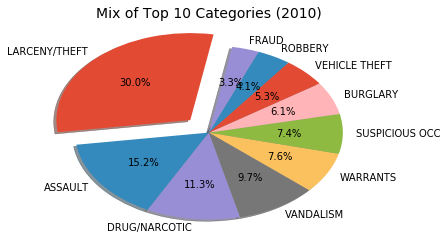

In [14]:
plt.style.use('ggplot')
fig = plt.figure()

plt.title("Mix of Top 10 Categories (2010)", fontsize=14)

# Put a legend below current axis
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(pctg_df['pct_2010'],  labels=categories, 
        autopct="{0:1.1f}%".format, shadow=True, explode=explode, startangle=80)
plt.savefig('output/pctg2010.png')
plt.show()

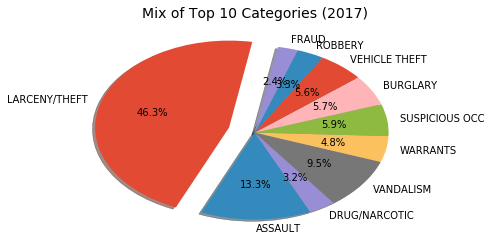

In [20]:
plt.style.use('ggplot')
fig = plt.figure()

plt.title("Mix of Top 10 Categories (2017)", fontsize=14)

# Put a legend below current axis
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(pctg_df['pct_2017'],  labels=categories, 
        autopct="{0:1.1f}%".format, shadow=True, explode=explode, startangle=80)
plt.savefig('output/pctg2017.png')
plt.show()

In [16]:
# Pivot Table by Meta Category at City Level

pvt_mcy = pd.pivot_table(subset_df, 
                        index=['year'], 
                        columns=['meta_cat'], 
                        values=['id'],
                        aggfunc='count',
                        #margins= True,
                        fill_value=0
                        )

# Save to a csv files.
pvt_mcy.to_csv('output/meta_categories_year.csv')

pvt_mcy

id             
meta_cat     BC     OI    WC
year                        
2010      57403  15392  8660
2011      58552  13246  8963
2012      67346  12744  8558
2013      72545  14137  8429
2014      74164  12134  8218
2015      80491  11066  8636
2016      78179  10221  8451
2017      84591   8149  8461

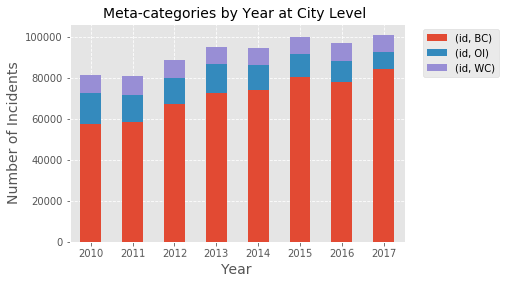

In [17]:
# Graph Change of Meta-categories by year at City Level

plt.style.use('ggplot')
fig = plt.figure()

pvt_mcy.plot(kind='bar',stacked=True)

plt.title("Meta-categories by Year at City Level " , fontsize=14)
plt.ylabel("Number of Incidents", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.grid(True, ls='dashed')

plt.xticks(rotation=(0.45))
plt.savefig('output/fig6.png')

# Put a legend below current axis
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig('output/mcatyear.png')
plt.show()